# Introduction to Machine Learning: Supervised Learning Final Project

## Problem Descrpition 

Pancreatic cancer is a devastating disease with a dismal prognosis, largely due to late diagnosis. This project aims to develop a machine learning model for the early detection of pancreatic cancer using a combination of novel urine biomarkers and clinical data.  The model will be trained and evaluated using methods learned throughout this course.  Urine biomarkers under consideration include LYVE1, REG1B, TFF1, plasma_CA19_9, creatinine, and clinical data will encompass data available on kaggle.  This study will address the challenges of early-stage detection and model generalizability.  The successful development of this model has the potential to revolutionize pancreatic cancer screening, leading to earlier diagnosis, improved survival rates, and reduced healthcare costs.

## Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [3]:
df= pd.read_csv("panc.csv")
df.head()

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.94884,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.46703,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.36600,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.57900,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.54000,41.088000,NaN


In [4]:
df.info

<bound method DataFrame.info of     sample_id patient_cohort sample_origin  age sex  diagnosis stage  \
0          S1        Cohort1          BPTB   33   F          1   NaN   
1         S10        Cohort1          BPTB   81   F          1   NaN   
2        S100        Cohort2          BPTB   51   M          1   NaN   
3        S101        Cohort2          BPTB   61   M          1   NaN   
4        S102        Cohort2          BPTB   62   M          1   NaN   
..        ...            ...           ...  ...  ..        ...   ...   
585      S549        Cohort2          BPTB   68   M          3    IV   
586      S558        Cohort2          BPTB   71   F          3    IV   
587      S560        Cohort2          BPTB   63   M          3    IV   
588      S583        Cohort2          BPTB   75   F          3    IV   
589      S590        Cohort1          BPTB   74   M          3    IV   

    benign_sample_diagnosis  plasma_CA19_9  creatinine     LYVE1       REG1B  \
0                      

In [5]:
df = df.drop(columns=['sample_id', 'patient_cohort', 'sample_origin', 'age', 'sex', 'stage', 'benign_sample_diagnosis'])
df = df.fillna(0)
df.head()

,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,1,11.7,1.83222,0.893219,52.94884,654.282174,1262.000
1,1,0.0,0.97266,2.037585,94.46703,209.488250,228.407
2,1,7.0,0.78039,0.145589,102.36600,461.141000,0.000
3,1,8.0,0.70122,0.002805,60.57900,142.950000,0.000
4,1,9.0,0.21489,0.000860,65.54000,41.088000,0.000


Data cleaning was done to remove any unwanted information ('sample_id', 'patient_cohort', 'sample_origin', 'age', 'sex', 'stage', 'benign_sample_diagnosis').
Also Null oriented values were changed to 0 for the purpose of this analysis.

In [6]:
print("Number of Healthy Blank:", sum(df['diagnosis']==1))
print("Number of Non-cancerous Pancreatic conditions:", sum(df['diagnosis']==2))
print("Number of pancreatic ductal adenocarcinoma Patitents:", sum(df['diagnosis']==3))
print("Number of Cronic Pancreatitis: 199")

Number of Healthy Blank: 183
Number of Non-cancerous Pancreatic conditions: 208
Number of pancreatic ductal adenocarcinoma Patitents: 199
Number of Cronic Pancreatitis: 199


In [7]:
df.isnull().sum()

diagnosis        0
plasma_CA19_9    0
creatinine       0
LYVE1            0
REG1B            0
TFF1             0
REG1A            0
dtype: int64

To check that there are no Null Values.

In [8]:
a = [np.nan, None, [], {}, 'NaN', 'Null','NULL','None','NA','?','-', '.','', ' ', '   ']
for c in df.columns: 
    string_null = np.array([x in a[2:] for x in df[c]])
    print(c, df[c].isnull().sum(), string_null.sum())

diagnosis 0 0
plasma_CA19_9 0 0
creatinine 0 0
LYVE1 0 0
REG1B 0 0
TFF1 0 0
REG1A 0 0


In [9]:
response = df['diagnosis'].value_counts()

print("Healthy Subjects:", response[1])
print("Number of Non-cancerous Pancreatic condition:", response[2])
print("Number of pancreatic ductal adenocarcinoma Patitents:", response[3])

Healthy Subjects: 183
Number of Non-cancerous Pancreatic condition: 208
Number of pancreatic ductal adenocarcinoma Patitents: 199


In [10]:
df.describe()

,diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
count,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000
mean,2.027119,387.967848,0.855383,3.063530,111.774090,597.868722,381.349244
std,0.804873,1898.191709,0.639028,3.438796,196.267110,1010.477245,1124.826230
min,1.000000,0.000000,0.056550,0.000129,0.001104,0.005293,0.000000
25%,1.000000,0.000000,0.373230,0.167179,10.757216,43.961000,0.000000
50%,2.000000,5.000000,0.723840,1.649862,34.303353,259.873974,16.563500
75%,3.000000,41.750000,1.139482,5.205037,122.741013,742.736000,224.007000
max,3.000000,31000.000000,4.116840,23.890323,1403.897600,13344.300000,13200.000000


This breakdown confirms that all features of the dataset are numerical and real-valued. 

In [11]:
print("Count of plasma_CA19_9 0-values:", sum(df['plasma_CA19_9']==0))
print("Count of LYVE1 0-values:", sum(df['LYVE1']==0))
print("Count of creatinine 0-values:", sum(df['creatinine']==0))
print("Count of REG1B 0-values:", sum(df['REG1B']==0))
print("Count of TFF1 0-values:", sum(df['TFF1']==0))
print("Count of REG1A 0-values:", sum(df['REG1A']==0))

Count of plasma_CA19_9 0-values: 241
Count of LYVE1 0-values: 0
Count of creatinine 0-values: 0
Count of REG1B 0-values: 0
Count of TFF1 0-values: 0
Count of REG1A 0-values: 291


There is a possibility of values having 0 since if there are no markers present in the urine sample it will come out as either 0 or null. 

/tmp/ipykernel_136/696137446.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


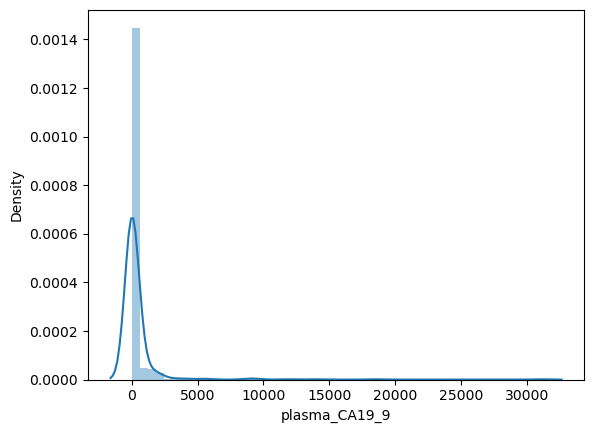

/tmp/ipykernel_136/696137446.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


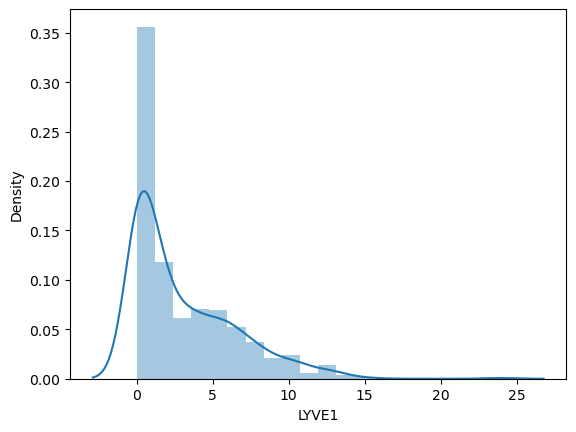

/tmp/ipykernel_136/696137446.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


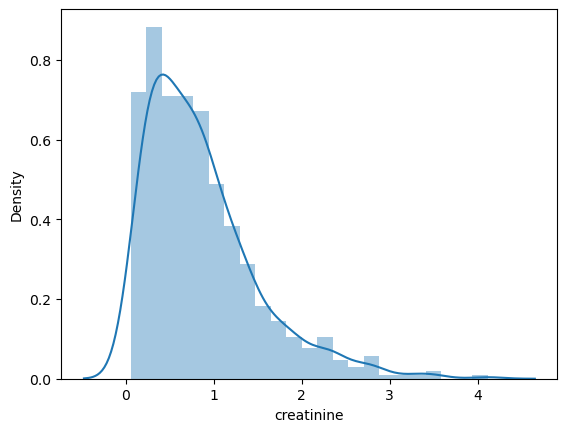

/tmp/ipykernel_136/696137446.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


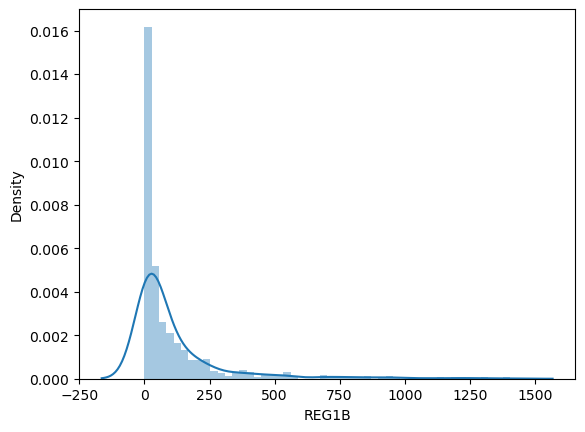

/tmp/ipykernel_136/696137446.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


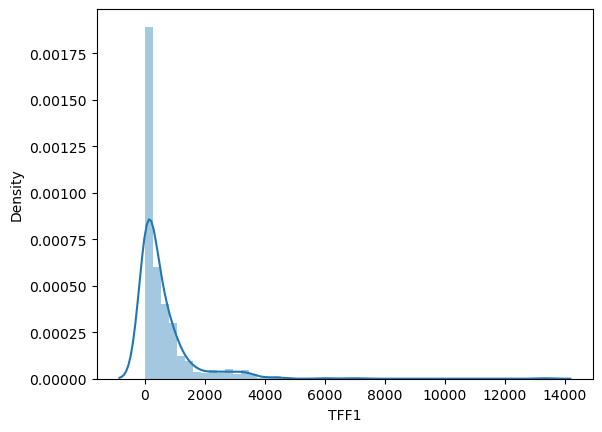

/tmp/ipykernel_136/696137446.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


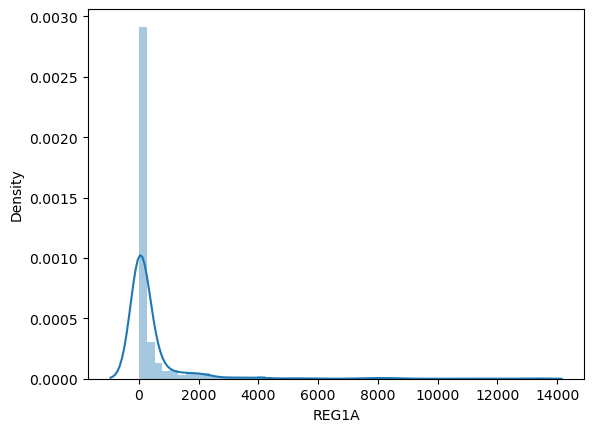

In [12]:
to_impute = ['plasma_CA19_9', 'LYVE1', 'creatinine', 'REG1B', 'TFF1','REG1A']

for col in to_impute:
    sns.distplot(df[col])
    plt.show()

Looking at the density plots we can see that there is a possiblity of having 0 for each of the 6 indicators. Also we can see that all 6 of the indicators have roughly the same density shape.

In [13]:
asym_col =['plasma_CA19_9', 'LYVE1', 'creatinine', 'REG1B', 'TFF1','REG1A']

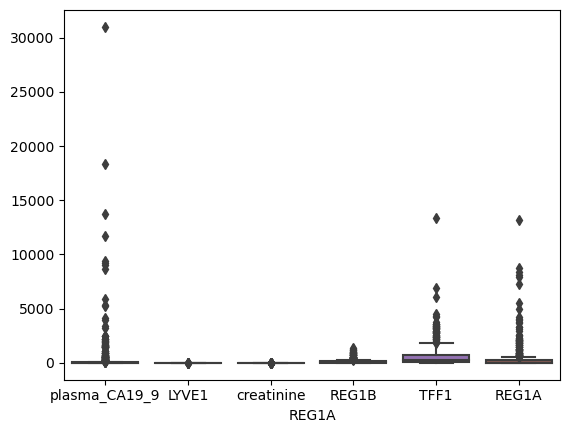

In [14]:
sns.boxplot(df[asym_col])
plt.xlabel(col)
plt.show()

These boxplots show some outlier in each of the given elements but is highly unreliable for analysis. 

In [15]:
plasma_outlier_upr = df['plasma_CA19_9'][df['plasma_CA19_9']!=0].max()
LYVE1_outlier_upr = df['LYVE1'][df['LYVE1']!=0].max()
creatinine_outlier_upr = df['creatinine'][df['creatinine']!=0].max()
REG1B_outlier_upr = df['REG1B'][df['REG1B']!=0].max()
TFF1_outlier_upr = df['TFF1'][df['TFF1']!=0].max()
REG1A_outlier_upr = df['REG1A'][df['REG1A']!=0].max()

In [16]:
plasma_CA19_9_mean = df['plasma_CA19_9'][(df['plasma_CA19_9']>0) & (df['plasma_CA19_9']<plasma_outlier_upr)].mean()
LYVE1_mean = df['LYVE1'][(df['LYVE1']>0) & (df['LYVE1']<LYVE1_outlier_upr)].mean()
creatinine_mean = df['creatinine'][(df['creatinine']>0) & (df['creatinine']<creatinine_outlier_upr)].mean()
REG1B_mean = df['REG1B'][(df['REG1B']>0) & (df['REG1B']<REG1B_outlier_upr)].mean()
TFF1_mean = df['TFF1'][(df['TFF1']>0) & (df['TFF1']<TFF1_outlier_upr)].mean()
REG1A_mean = df['REG1A'][(df['REG1A']>0) & (df['REG1A']<REG1A_outlier_upr)].mean()

In [17]:
df['plasma_CA19_9'] = df['plasma_CA19_9'].where(df['plasma_CA19_9']!=0, plasma_CA19_9_mean )
df['LYVE1'] = df['LYVE1'].where(df['LYVE1']!=0, LYVE1_mean )
df['creatinine'] = df['creatinine'].where(df['creatinine']!=0, creatinine_mean )
df['REG1B'] = df['REG1B'].where(df['REG1B']!=0, REG1B_mean )
df['TFF1'] = df['TFF1'].where(df['TFF1']!=0, TFF1_mean )
df['REG1A'] = df['REG1A'].where(df['REG1A']!=0, REG1A_mean )

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 74.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


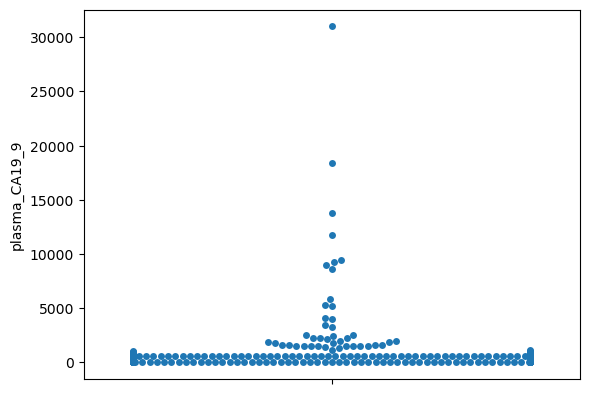

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 20.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


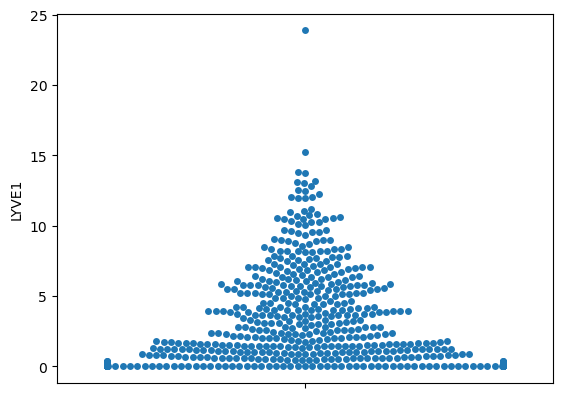

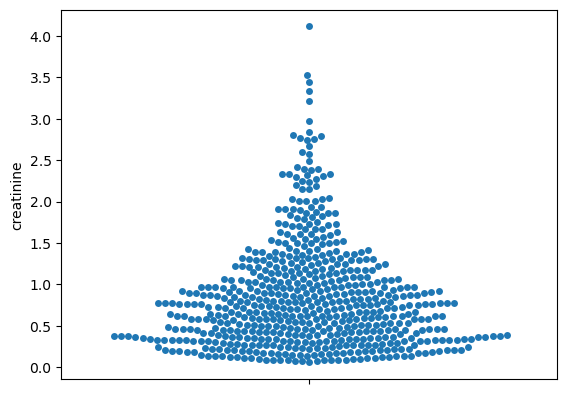

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 39.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


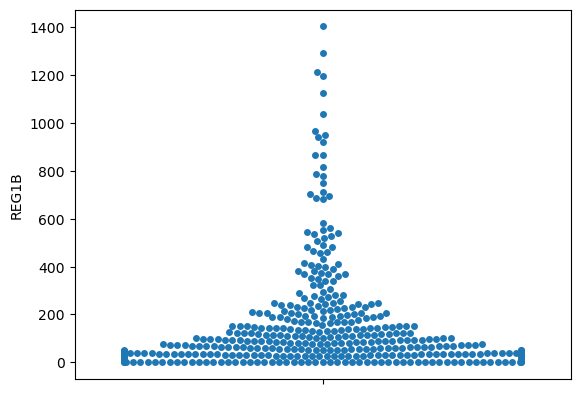

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 47.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


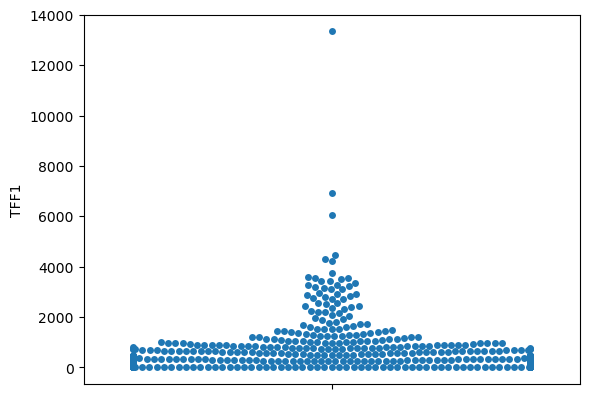

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 61.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


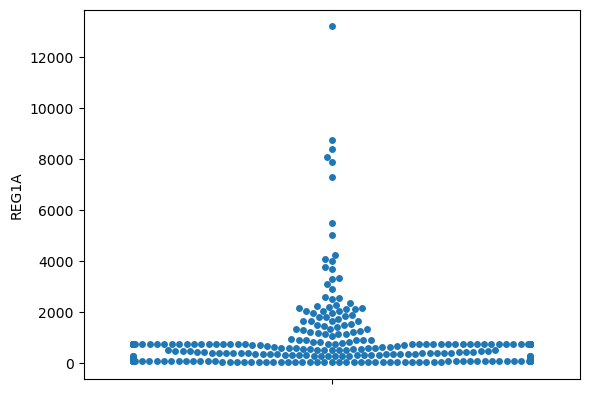

In [18]:
for col in to_impute:
    sns.swarmplot(df[col])
    plt.show()

Once again when looking at these swarmplots we can say that for analysis it is not reliable due to its shape being irregular even after replacement of outliers being replaced with mean values

/tmp/ipykernel_136/1234301009.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.bool))


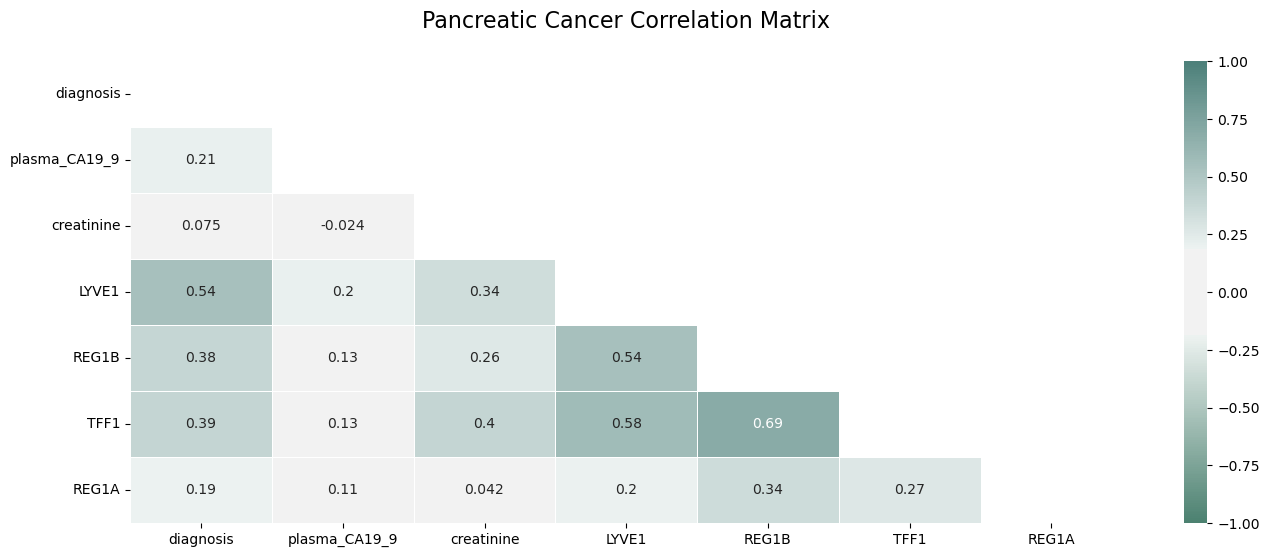

In [19]:
plt.figure(figsize = (16,6))
mask = np.triu(np.ones_like(df.corr(), 
                            dtype = np.bool))
cmap = sns.diverging_palette(162, 
                              180, 
                              s = 60, 
                              l = 50, 
                              sep = 48, 
                              n = 16,
                              as_cmap = True)
heatmap = sns.heatmap(df.corr(), 
                      mask = mask, 
                      vmin = -1, 
                      vmax = 1, 
                      annot = True,
                      cmap = cmap, 
                      linewidths = 0.5)
heatmap.set_title('Pancreatic Cancer Correlation Matrix', 
                  fontdict = {'fontsize':16}, 
                  pad = 24)
plt.show()

The highest rate of diagnosis was the indicator LYVE1.

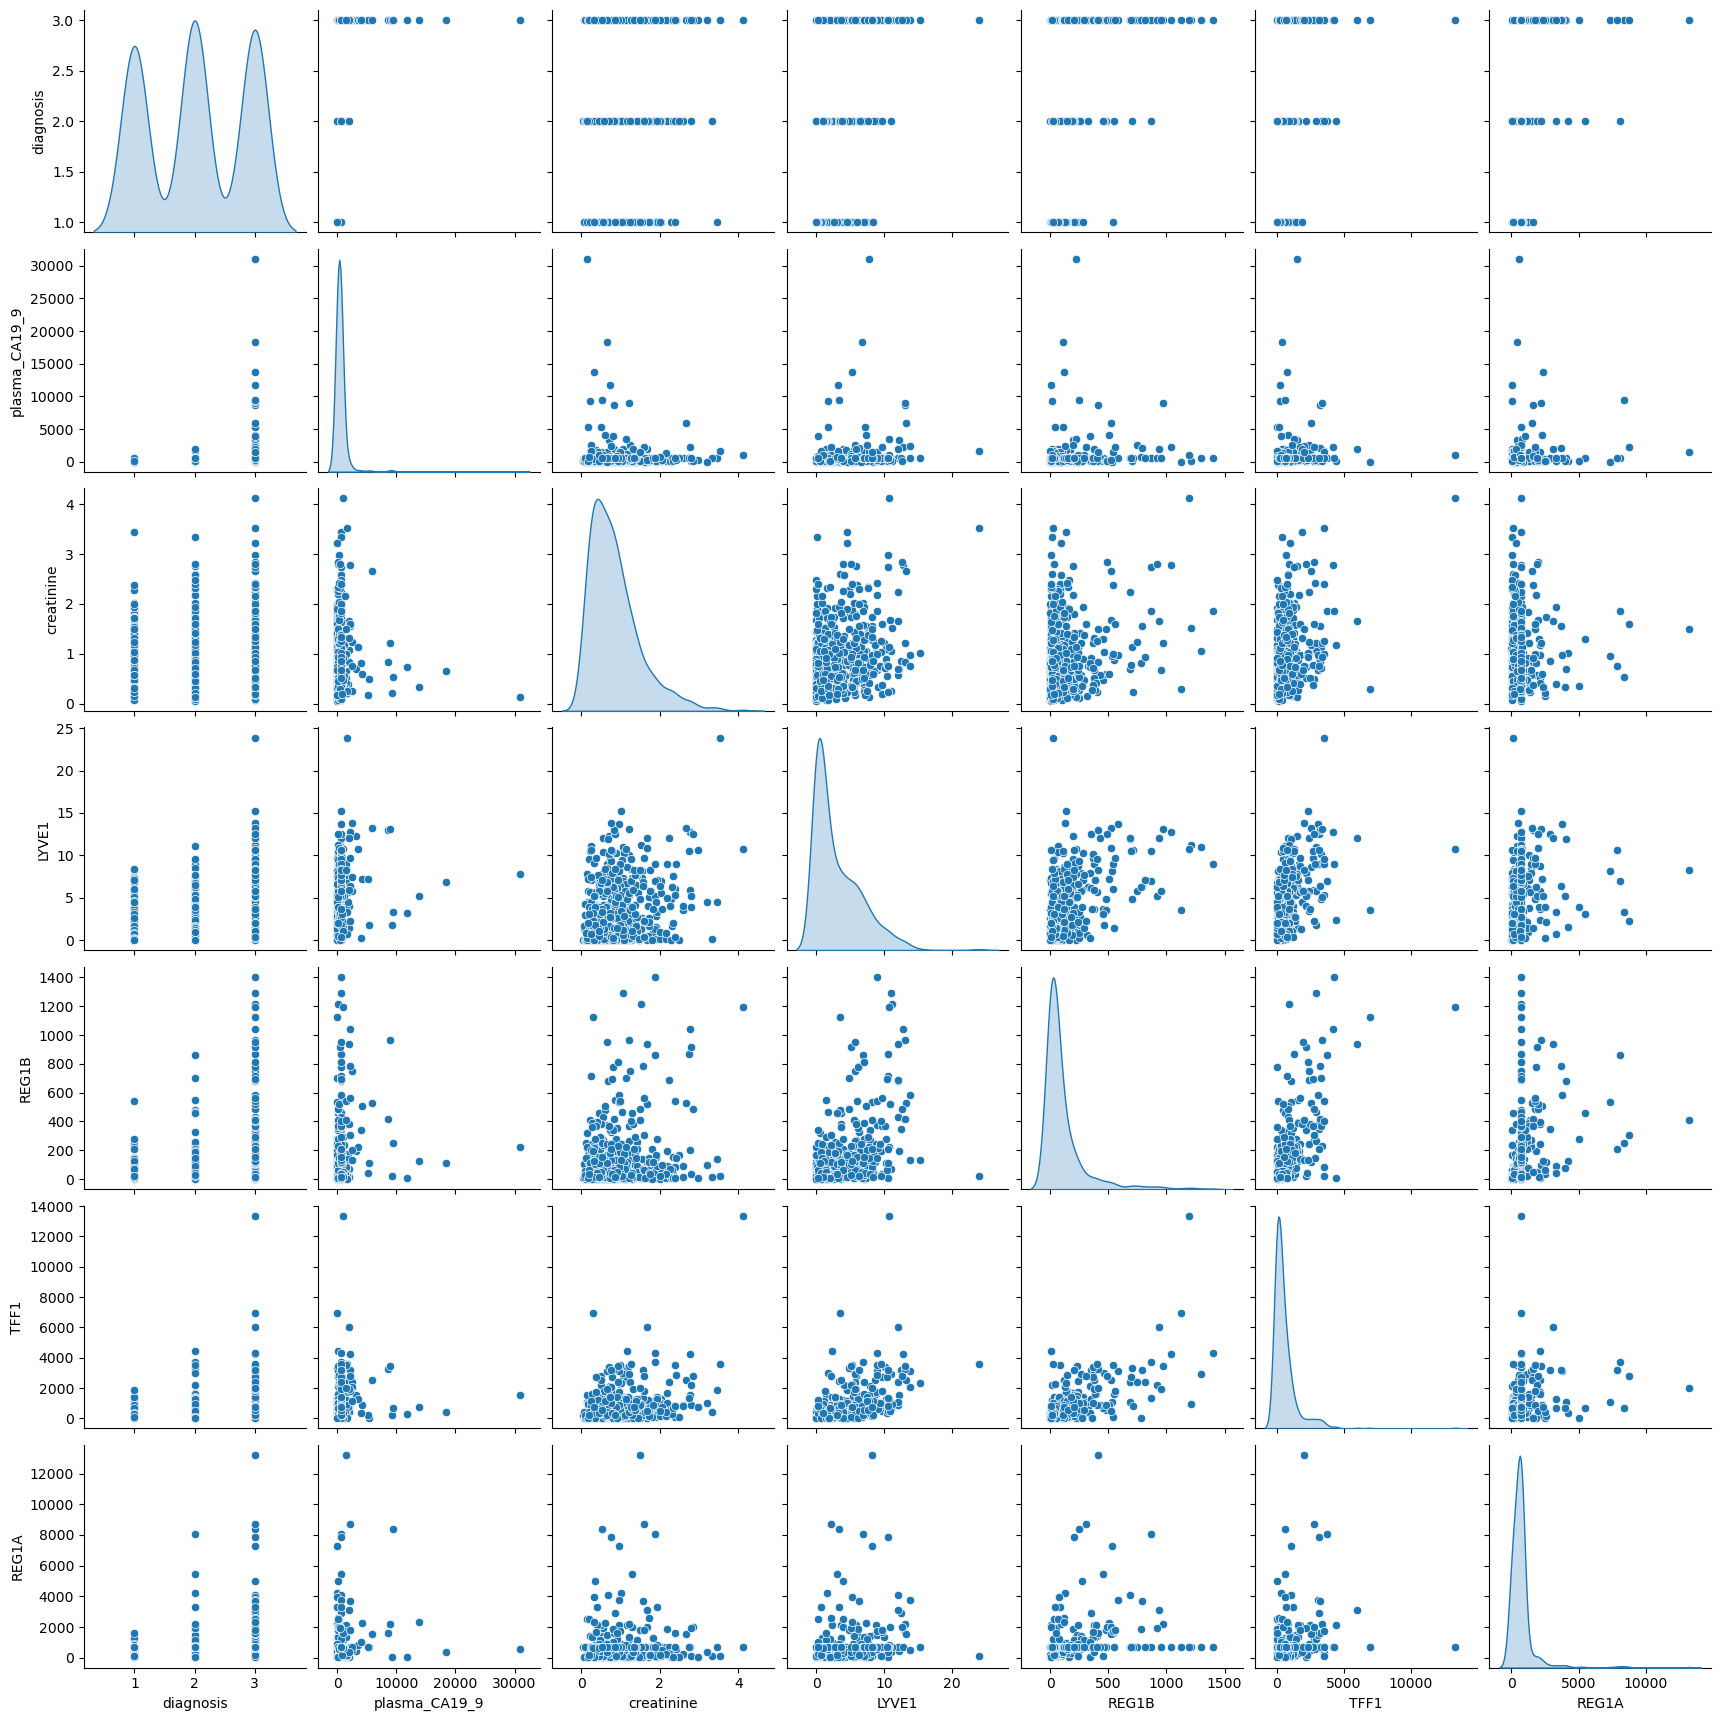

In [20]:
pairs = sns.pairplot(df, diag_kind = 'kde')

This pairplot confirms our observations from the correlation matrix.

# Model Building and Results

In [21]:
y = df['diagnosis']
X = df.loc[:, df.columns!='diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)

print("Size of training dataset:", len(X_train), "rows")
print("Size of testing dataset:", len(X_test), "rows")

Size of training dataset: 472 rows
Size of testing dataset: 118 rows


### Decision Tree

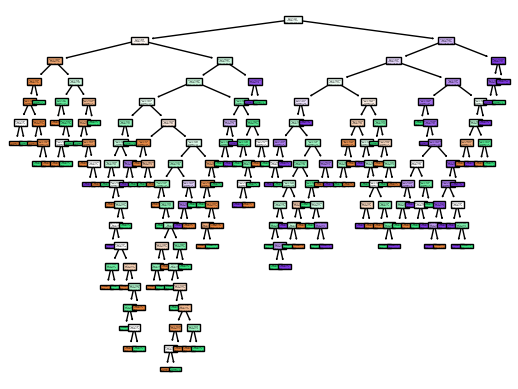

Decision tree training accuracy: 1.0
Decision tree testing accuracy: 0.6016949152542372
Number of leaf nodes: 118


In [22]:
dt = tree.DecisionTreeClassifier(random_state = 12).fit(X_train, y_train)
tree.plot_tree(dt, filled=True)
plt.show()

dt_pred = dt.predict(X_test)
print("Decision tree training accuracy:", dt.score(X_train, y_train))
print("Decision tree testing accuracy:", dt.score(X_test, y_test))
print("Number of leaf nodes:", dt.get_n_leaves())

Unconstrained, DecisionTreeClassifier naturally constructs a large tree. It is overfitted, correctly classifying 100% of the training points, but only yielding a 60% accuracy on the test data set.

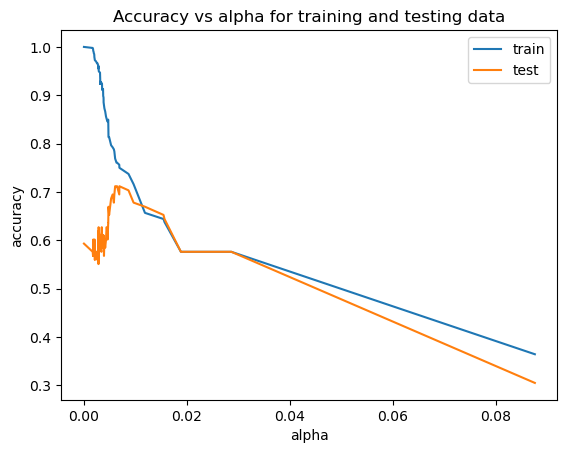

Max test accuracy is 0.711864406779661 and occurs at alpha 0.006055976806422839


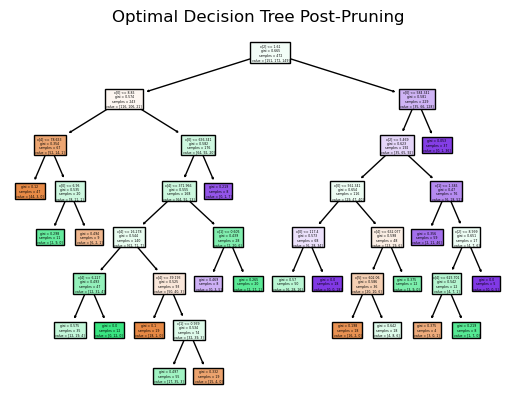

Number of leaves pre-pruning: 118
Number of leaves post-pruning: 21
Final depth: 7


In [23]:
path = dt.cost_complexity_pruning_path(X_train,y_train) 
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = [] 

for alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(ccp_alpha = alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing data")
ax.plot(ccp_alphas, train_scores , label="train")
ax.plot(ccp_alphas, test_scores, label="test")
ax.legend()
plt.show()

best_dt = clfs[test_scores.index(max(test_scores))]
print("Max test accuracy is", max(test_scores), "and occurs at alpha", best_dt.ccp_alpha)


tree.plot_tree(clfs[test_scores.index(max(test_scores))], filled=True)
plt.title("Optimal Decision Tree Post-Pruning")
plt.show()

print("Number of leaves pre-pruning:", dt.get_n_leaves())
print("Number of leaves post-pruning:", best_dt.get_n_leaves())
print("Final depth:", best_dt.get_depth())

This decision tree has undergone significant pruning, as evidenced by the decrease in leaves from 118 to 21. The tree was overfitting the training data before pruning. The final depth of 7 indicates that the tree makes decisions based on a sequence of at least 7 questions or criteria. The different colors of the leaves might represent different classes or outcomes, suggesting a classification task. The tree appears unbalanced, with some branches extending much deeper than others. This could indicate that certain features or combinations of features are more important for decision-making than others.

### Random Forest Classifier

In [34]:
rf = RandomForestClassifier(random_state = 42).fit(X_train, y_train)

In [35]:
print("Unmodified Random Forest has training score of", 
      rf.score(X_train, y_train), 
      "and test score of", 
      rf.score(X_test, y_test))

Unmodified Random Forest has training score of 1.0 and test score of 0.6779661016949152


The test score of the unmodified RFC has a test score better than the unmodified decision tree with a test score of 66% which is still low but looks very promising.

In [36]:
print("Max depth of all estimator trees in rf:", 
      max([dt.get_depth() for dt in rf.estimators_]))
print("Number of estimators in rf:", len(rf.estimators_))

Max depth of all estimator trees in rf: 22
Number of estimators in rf: 100


The max depth of the largest tree of the RFC is 22, which larger than the tree that we optimized in the previous section. 

In [37]:
clf = RandomForestClassifier(n_jobs = -1, random_state = 42)

parameters = {'n_estimators':np.arange(50, 1050, 50),
              'max_depth':np.arange(10,20)}

grid = GridSearchCV(estimator = clf, 
                    param_grid = parameters, 
                    n_jobs = -1)

grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'n_estimators': array([  50,  100,  150,  200,  250,  300,  350,  400,  450,  500,  550,
        600,  650,  700,  750,  800,  850,  900,  950, 1000])})

In [29]:
best_rf = grid.best_estimator_

print(f'Optimal Random Forest model has max depth {best_rf.max_depth}, with {best_rf.n_estimators} estimators.')

print(f'Final test data accuracy: {best_rf.score(X_test, y_test):.2%}')

print(f'Cross validation score: {grid.best_score_:.2%}')

Optimal Random Forest model has max depth 16, with 850 estimators.
Final test data accuracy: 67.80%
Cross validation score: 68.03%


Here we see that the accuracy score and cross-validation score are not that different. If we were to take a brute force approach, without using the cross-validation method it may lead to a detection of a different parameter leading to a gertaer accuracy. 

In [48]:
test_depth = 10
test_est = 50

test_rf = RandomForestClassifier(max_depth = test_depth, n_estimators = test_est, random_state = 42)
test_rf.fit(X_train, y_train)

test_acc_score = test_rf.score(X_test, y_test)
test_cv = np.mean(cross_val_score(test_rf, X_train, y_train))

print(test_rf)
print(f'Test data score: {test_acc_score:.2%}')
print(f'Cross validation Score: {test_cv:.2%}')

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)
Test data score: 69.49%
Cross validation Score: 65.70%


In this example, we see that it is possible to tweak the model parameters on the test data until we achieve an optimal score, but that could constitute a "post-hoc" approach in which we were overfitting the model to the test data. Therefore by introducing cross validation post-hoc is prevented.Even so the socre indicates that the model is not that reliable.

In summary, even the optimized RFC has a low score meaning that either the data is wrong or the correlation between the different indicators and pancreatic cancer are weak. 

In one last attempt to create a stronger algorithm AdaBoost ensemble method will be used.

### AdaBoost

In [31]:
ada_clf = AdaBoostClassifier(random_state=12)
ada_clf.fit(X_train, y_train)

print(f'AdaBoost initial test accuracy score is {ada_clf.score(X_test, y_test):.2%}')

AdaBoost initial test accuracy score is 61.86%


Once again the original accuracy score is close to the other two options

Therefore, GridSearchCV will be used to find an optimal solution.

In [32]:
clf = AdaBoostClassifier(random_state=12)

parameters = {'n_estimators':np.arange(100, 210, 10), 
              'learning_rate':[0.01, 0.1, 1, 10]}

grid_ada = GridSearchCV(estimator = clf, 
                        param_grid = parameters)

grid_ada.fit(X_train, y_train)


GridSearchCV(estimator=AdaBoostClassifier(random_state=12),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10],
                         'n_estimators': array([100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200])})

In [33]:
print(grid_ada.best_params_)
print(grid_ada.best_score_)

{'learning_rate': 1, 'n_estimators': 170}
0.5954759238521837


In [34]:
best_ada = grid_ada.best_estimator_
l_rate = best_ada.get_params()['learning_rate']
n_est = best_ada.get_params()['n_estimators']
acc_score = best_ada.score(X_test, y_test)

print(f'Optimal AdaBoost model has learning rate {l_rate}, with {n_est} estimators.')

print(f'Final test data accuracy: {acc_score:.2%}')

Optimal AdaBoost model has learning rate 1, with 170 estimators.
Final test data accuracy: 65.25%


Once again we fail to increase the accuracy of the test. 

### Conclusion

In [36]:
print("Decision Tree Classification Report:", '\n', classification_report(y_test, best_dt.predict(X_test)), '\n')
print("Random Forest Classification Report:", '\n', classification_report(y_test, best_rf.predict(X_test)), '\n')
print("AdaBoost Classification Report:", '\n', classification_report(y_test, best_ada.predict(X_test)), '\n')

Decision Tree Classification Report: 
               precision    recall  f1-score   support

           1       0.67      0.62      0.65        32
           2       0.54      0.69      0.61        36
           3       0.93      0.78      0.85        50

    accuracy                           0.71       118
   macro avg       0.71      0.70      0.70       118
weighted avg       0.74      0.71      0.72       118
 

Random Forest Classification Report: 
               precision    recall  f1-score   support

           1       0.70      0.50      0.58        32
           2       0.52      0.67      0.59        36
           3       0.82      0.80      0.81        50

    accuracy                           0.68       118
   macro avg       0.68      0.66      0.66       118
weighted avg       0.69      0.68      0.68       118
 

AdaBoost Classification Report: 
               precision    recall  f1-score   support

           1       0.59      0.53      0.56        32
           2 

This study explored the potential of using six urinary biomarkers for the diagnosis of pancreatic cancer. Despite employing three distinct modeling techniques, a reliable and effective model remained elusive. This highlights two critical points:

1. The complexity of pancreatic cancer diagnosis:  The difficulty in developing an accurate diagnostic model underscores the inherent challenges in identifying reliable indicators of this disease. This reinforces the urgent need for increased funding and research efforts dedicated to pancreatic cancer.

2. Limitations of current biomarkers and data: The inability to achieve a robust model suggests that the correlation between these six urinary biomarkers and pancreatic cancer may not be strong enough for accurate diagnosis. Further research is needed to explore other potential biomarkers and improve data quality.

This study emphasizes the need for continued investigation into novel diagnostic approaches for pancreatic cancer, ultimately aiming to improve early detection and patient outcomes.

## Resources

Data: Urinary biomarkers for pancreatic cancer
https://www.kaggle.com/datasets/johnjdavisiv/urinary-biomarkers-for-pancreatic-cancer